In [1]:
import os
import random
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# DATASET ACQUISITION 
dataset can be downloaded from the following link:
https://warp.whoi.edu/vmat/

In [4]:
# Path to your dataset (update this path as needed)
image_folder = '/content/drive/MyDrive/GX010090_shark.MP4_clip'
annotation_file = '/content/GX010090_shark.MP4_clip_obj0.txt'

# DATASET VISUALIZATION

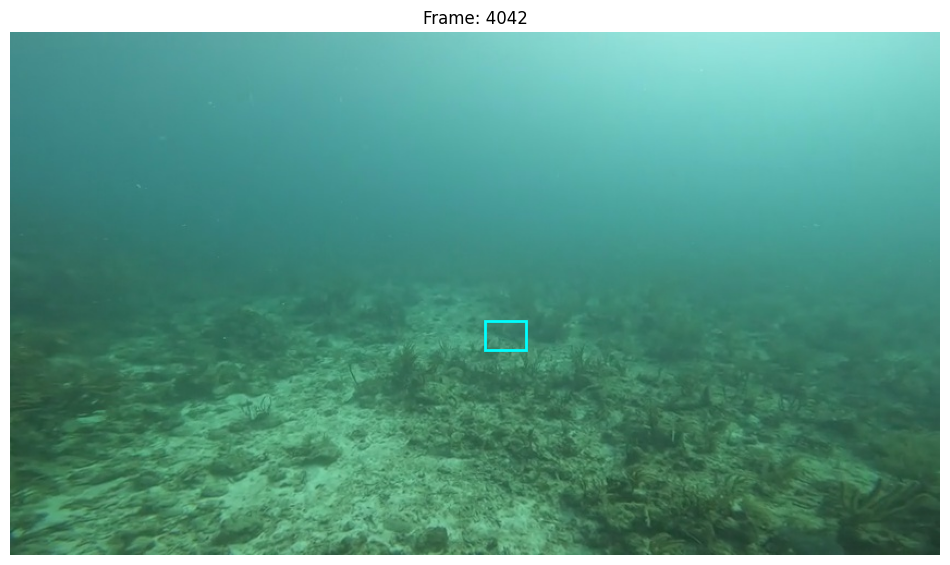

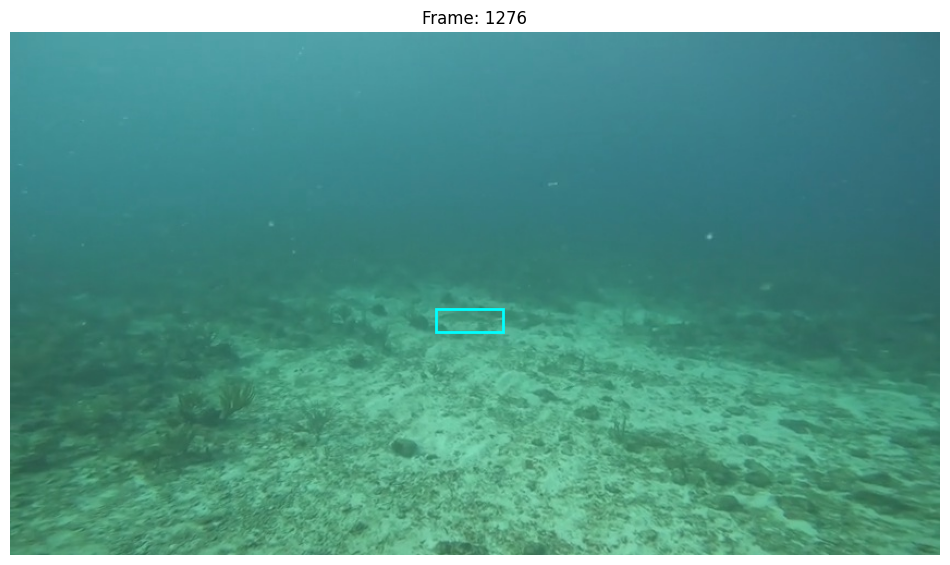

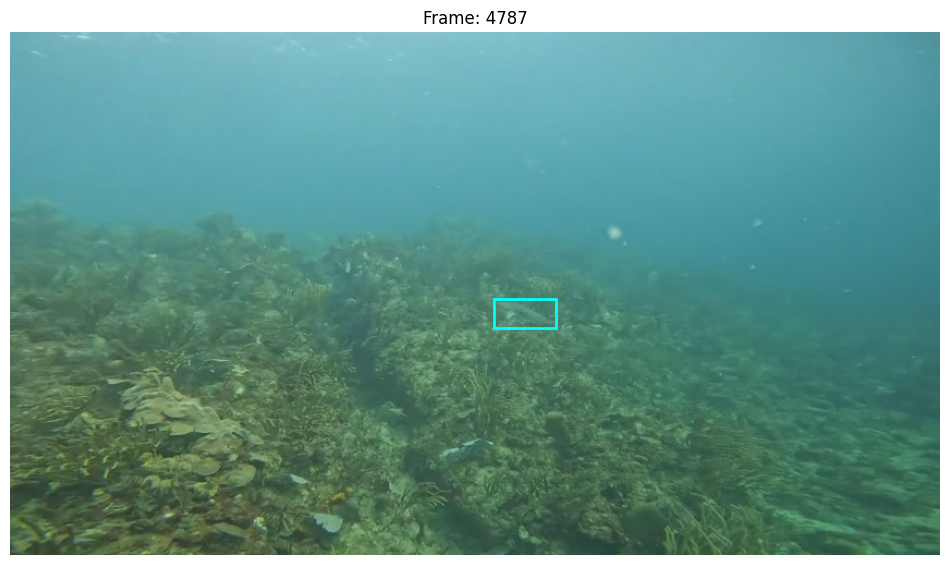

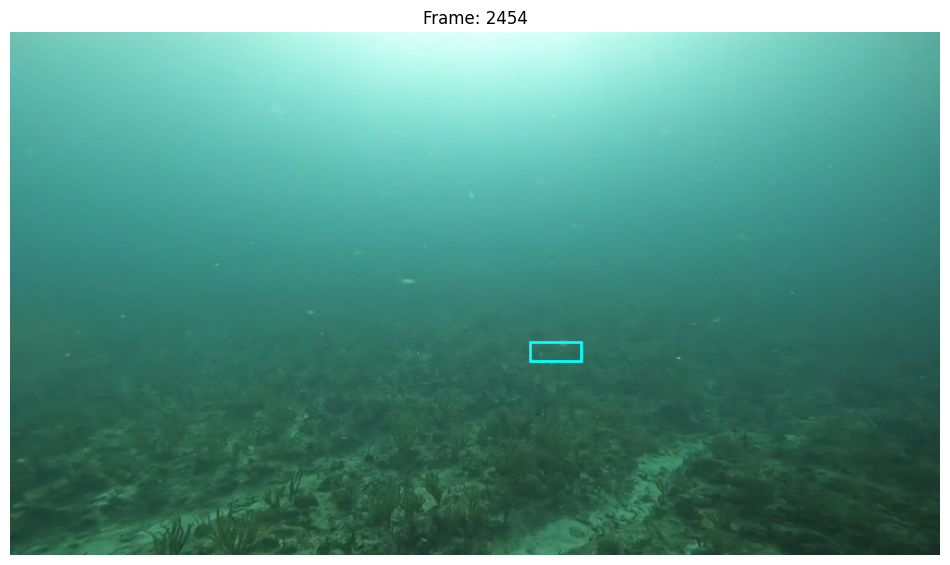

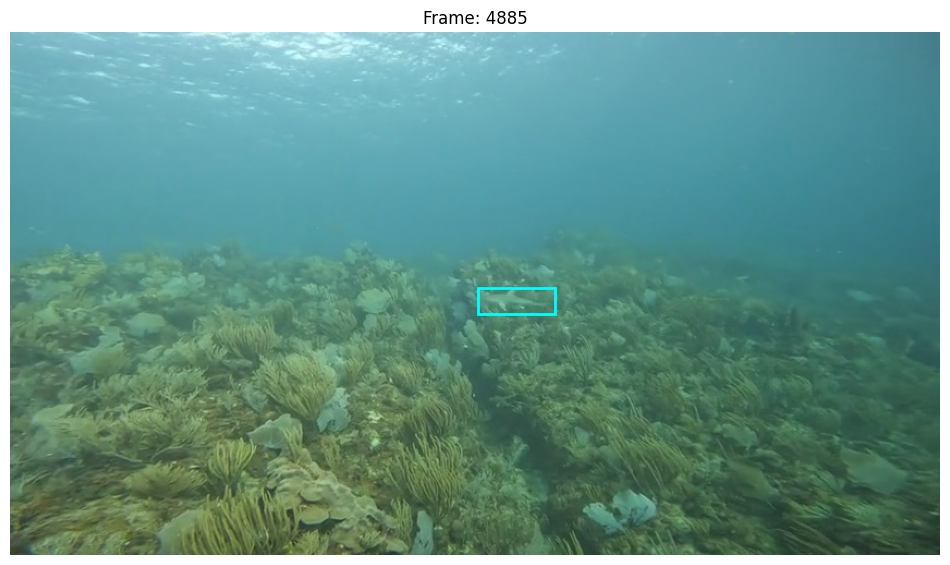

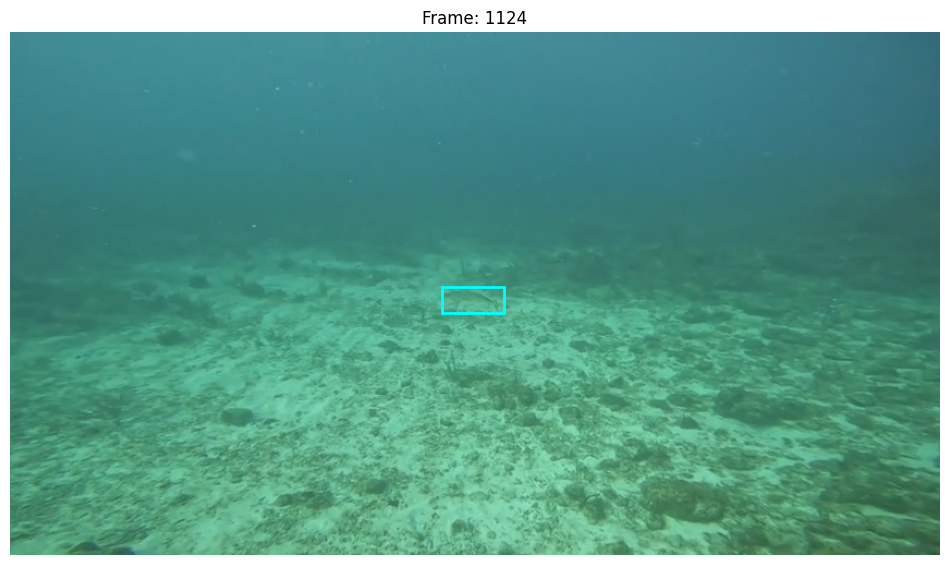

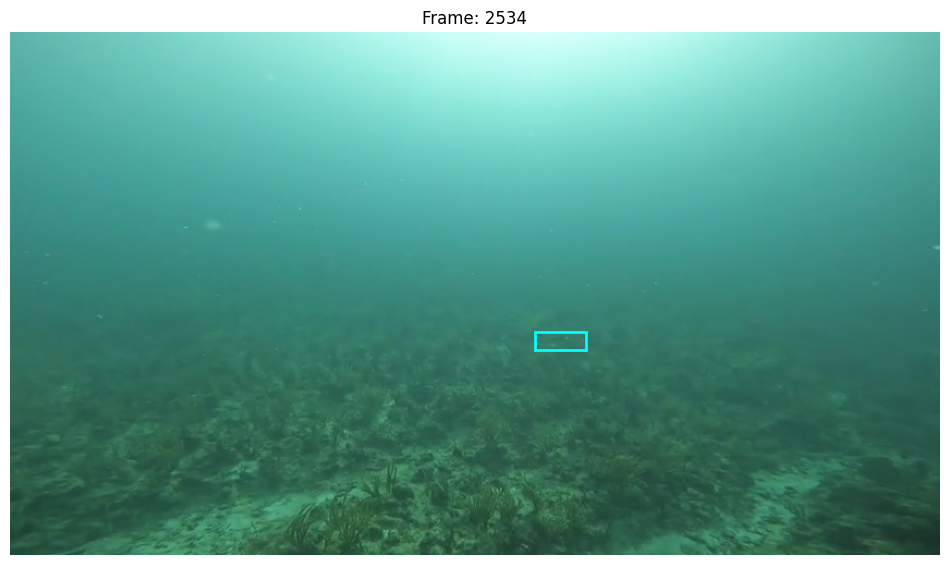

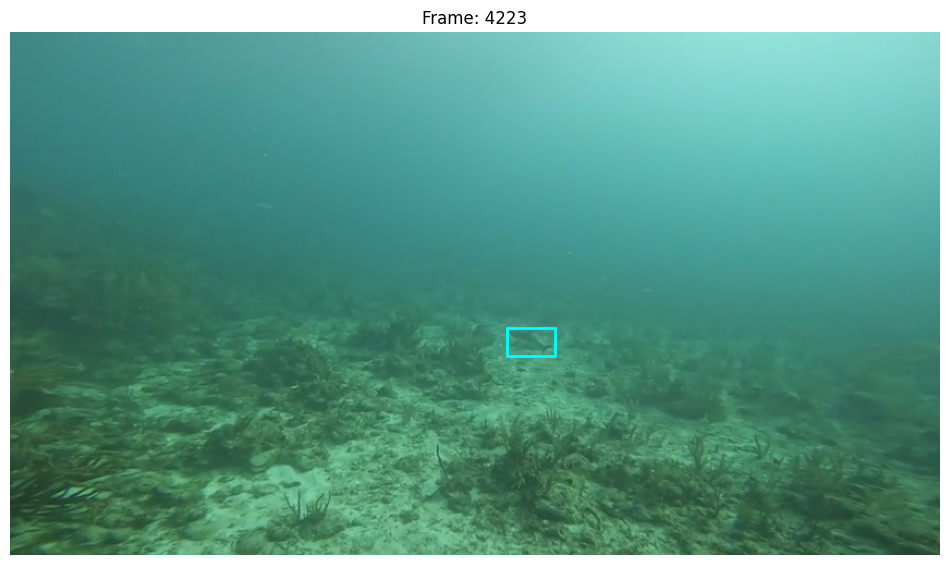

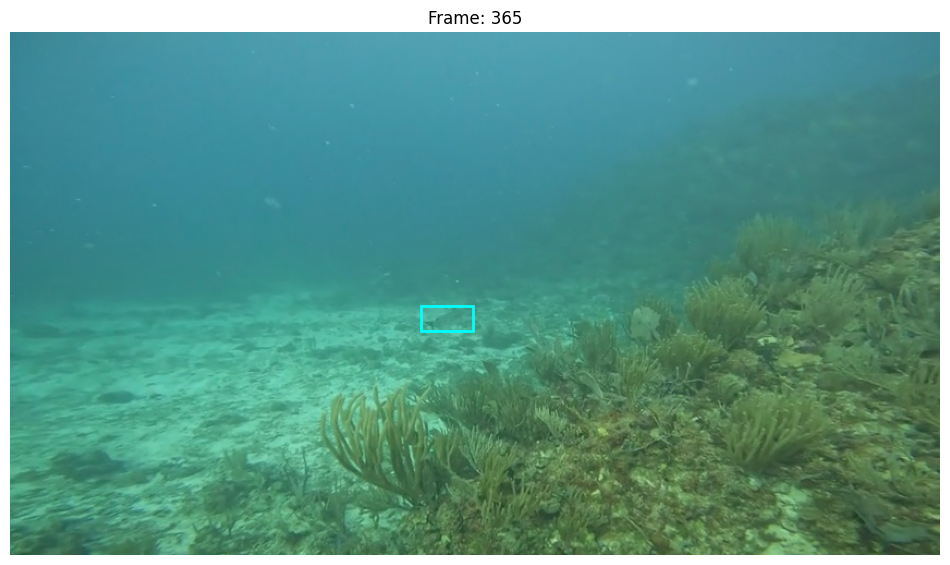

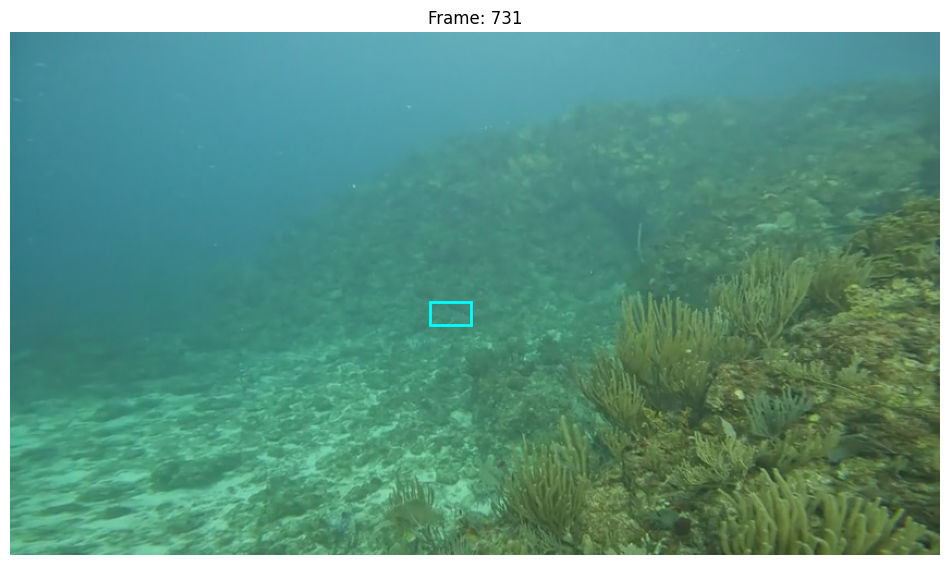

In [13]:
# Load annotations
annotations = pd.read_csv(annotation_file, sep='\s+', header=None)
annotations.columns = ['left', 'top', 'width', 'height']

# Add frame number (assuming frames start at 1)
annotations['frame'] = annotations.index + 1

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches


def show_random_images(n_images=5):
    selected_frames = np.random.choice(annotations.index, n_images, replace=False)

    for frame_idx in selected_frames:
        frame_annotation = annotations.iloc[frame_idx]
        frame_number = frame_annotation['frame']
        image_path = f'{image_folder}/{frame_number_to_filename(frame_number)}'

        # Load image and handle errors
        image = cv2.imread(image_path)
        if image is None:
            print(f"Image {image_path} not found or unreadable.")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Draw bounding box
        left = frame_annotation['left']
        top = frame_annotation['top']
        width = frame_annotation['width']
        height = frame_annotation['height']

        fig, ax = plt.subplots(figsize=(12, 8))
        ax.imshow(image)
        rect = patches.Rectangle((left, top), width, height, linewidth=2, edgecolor='cyan', facecolor='none')
        ax.add_patch(rect)
        plt.title(f'Frame: {frame_number}')
        plt.axis('off')
        plt.show()

# Helper function to format frame numbers
def frame_number_to_filename(frame_number):
    return f"{frame_number:05d}.jpg"  # This will convert 1 to 00001.jpg

# Run the visualization
show_random_images(n_images=10)

